In [1]:
import numpy as np
from matplotlib import pyplot as plt
import real_space_electrostatic_sum
bohr = 0.52917721067

# Benchmarking

Using the shared library `real-space-electrostatic-sum.so`, together with the Python wrapper in `real_space_electrostatic_sum.py`, this notebook reproduces results from [Pickard, *Phys. Rev. Mat.* **2**, 013806 (2018)](https://doi.org/10.1103/PhysRevMaterials.2.013806), verifying that the Fortran implementation works properly.

## Reproducing part of Fig. 1(b)

Fig. 1(b) in the paper demonstrates the convergence of the method (with damping) for a simple cubic lattice with unit spacing.

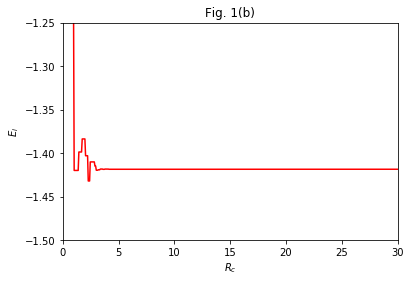

In [2]:
# lattice vectors
a_x = np.array([1.0, 0.0, 0.0])
a_y = np.array([0.0, 1.0, 0.0])
a_z = np.array([0.0, 0.0, 1.0])

# ion locations
loc = np.zeros([1,3])
chg = np.ones(1)

# loop over cutoff radii
r_c = np.linspace(0.001,30,500)
r_d = 1.5
ene = np.zeros(len(r_c))
for i, r in enumerate(r_c):
    ene[i] = real_space_electrostatic_sum.energy(a_x, a_y, a_z, loc.shape[0], loc, chg, r, r_d)
    
# generate part of Fig. 1(b)
plt.plot(r_c, ene, 'r')
plt.title('Fig. 1(b)')
plt.xlim([0,30]); plt.ylim([-1.5,-1.25])
plt.xlabel('$R_c$');  plt.ylabel('$E_i$')
plt.show()

## Reproducing data in Table I

Table I in the paper contains reference ion-ion energies for four crystals. The relevant data are re-generated below, and agreement with the original data is apparent to at least four significant figures. The remaining discrepancies are likely due to small differences in the lattice constants.

### _Al_

FCC primitive cell, based on lattice constant from the ICSD.

In [3]:
# lattice vectors
a_x = 4.04975 * np.array([0.5, 0.5, 0.0]) / bohr
a_y = 4.04975 * np.array([0.0, 0.5, 0.5]) / bohr
a_z = 4.04975 * np.array([0.5, 0.0, 0.5]) / bohr

# ion locations
loc = np.zeros([1,3])

# charge array
chg = 3.0 * np.ones(loc.shape[0])

# length scale
h_max = 4.42

# compute energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))

R̂d = 2.0,    energy per cell =   -2.695949221
R̂d = 1.5,    energy per cell =   -2.695949220
R̂d = 1.0,    energy per cell =   -2.696022609


### _Si_

Diamond cubic primitive cell, based on lattice constant from the ICSD.

In [4]:
# lattice vectors
a_x = 5.43053 * np.array([0.5, 0.5, 0.0]) / bohr
a_y = 5.43053 * np.array([0.0, 0.5, 0.5]) / bohr
a_z = 5.43053 * np.array([0.5, 0.0, 0.5]) / bohr

# ion locations
loc = np.zeros([2, 3])
loc[1,:] = 5.43053 * np.array([0.25, 0.25, 0.25]) / bohr

# charge array
chg = 4.0 * np.ones(loc.shape[0])

# length scale
h_max = 5.92

# compute energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))

R̂d = 2.0,    energy per cell =   -8.398652105
R̂d = 1.5,    energy per cell =   -8.398652103
R̂d = 1.0,    energy per cell =   -8.398667072


### _SiO2_

Structure obtained by:
* downloading relevant .cif file from the ICSD (based on the collection code);
* loading .cif file into VESTA and then exporting as .vasp file;
* copying lattice vectors and atom positions from .vasp file.

In [5]:
# lattice vectors
a_x = np.array([ 4.9130001068, 0.0000000000, 0.0000000000]) / bohr
a_y = np.array([-2.4565000534, 4.2547829013, 0.0000000000]) / bohr
a_z = np.array([ 0.0000000000, 0.0000000000, 5.4050002098]) / bohr

# ion locations
loc = np.array([
    [ 2.284545183, 0.000000000, 1.801666737],
    [-1.142272592, 1.978473902, 3.603333473],
    [ 1.314227462, 2.276308537, 0.000000000],
    [ 1.370726824, 1.157300949, 1.151265025],
    [ 3.225384474, 0.608433843, 2.952931643],
    [ 2.773388386, 2.489048004, 4.754598618],
    [ 0.316888690, 1.765734792, 4.253735065],
    [-1.085773110, 3.097481728, 2.452068567],
    [ 0.768884659, 3.646348715, 0.650401771] ]) / bohr

# charge array
chg = np.zeros(loc.shape[0])
chg[:3] = 4.0
chg[3:] = 6.0

# length scale
h_max = 10.21

# compute energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))

R̂d = 2.0,    energy per cell =  -69.488097471
R̂d = 1.5,    energy per cell =  -69.488097466
R̂d = 1.0,    energy per cell =  -69.487432799


### _Al2SiO5_

Structure obtained by:
* downloading relevant .cif file from the ICSD (based on the collection code);
* loading .cif file into VESTA and then exporting as .vasp file;
* copying lattice vectors and atom positions from .vasp file.

In [6]:
# lattice vectors
a_x = np.array([7.7941999435, 0.0000000000, 0.0000000000]) / bohr
a_y = np.array([0.0000000000, 7.8984999657, 0.0000000000]) / bohr
a_z = np.array([0.0000000000, 0.0000000000, 5.5590000153]) / bohr

# ion locations
loc = np.array([
    [0.000000000, 0.000000000, 1.346389771],
    [0.000000000, 0.000000000, 4.212610245],
    [3.897099972, 3.949249983, 1.433110118],
    [3.897099972, 3.949249983, 4.125889778],
    [2.890089273, 1.095521927, 2.779500008],
    [4.904110432, 6.802978039, 2.779500008],
    [1.007010698, 5.044772148, 0.000000000],
    [6.787189484, 2.853728056, 0.000000000],
    [1.918931961, 1.997530699, 0.000000000],
    [5.875267982, 5.900969505, 0.000000000],
    [1.978168011, 5.946780682, 2.779500008],
    [5.816031933, 1.951719284, 2.779500008],
    [3.298505545, 2.864785910, 2.779500008],
    [4.495694637, 5.033714294, 2.779500008],
    [0.598594487, 6.814035892, 0.000000000],
    [7.195605278, 1.084464192, 0.000000000],
    [3.304740667, 2.866365433, 0.000000000],
    [4.489459038, 5.032134056, 0.000000000],
    [0.592359245, 6.815615654, 2.779500008],
    [7.201840878, 1.082884431, 2.779500008],
    [0.809037924, 3.169668198, 0.000000000],
    [6.985161781, 4.728831768, 0.000000000],
    [3.088062048, 7.118917942, 2.779500008],
    [4.706138134, 0.779581845, 2.779500008],
    [1.795004249, 1.060768485, 1.328601003],
    [5.999195576, 6.837731361, 4.230399132],
    [5.999195576, 6.837731361, 1.328601003],
    [1.795004249, 1.060768485, 4.230399132],
    [2.102095604, 5.010018349, 1.450899005],
    [5.692104340, 2.888481379, 4.108100891],
    [5.692104340, 2.888481379, 1.450899005],
    [2.102095604, 5.010018349, 4.108100891] ]) / bohr

# charge array
chg = np.zeros(loc.shape[0])
chg[:8] = 3.0
chg[8:12] = 4.0
chg[12:] = 6.0

# length scale
h_max = 14.93

# compute energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f},    energy per cell = {1:14.9f}'.format(r_d_hat, ene))

R̂d = 2.0,    energy per cell = -244.055010549
R̂d = 1.5,    energy per cell = -244.055010543
R̂d = 1.0,    energy per cell = -244.054923844


## Madelung energy for NaCl

See the discussion around Eq. (1) in [Mamode, _J. Math. Chem._ __55__, 734 (2017)](https://doi.org/10.1007/s10910-016-0705-9).

With $M_{\mathrm{NaCl}}$ as the Madelung energy and $E_{\mathrm{NaCl}}$ as the energy of a two-atom primitive cell having $z_{1,2}=\pm 1$, the following identities hold

\begin{equation}
\begin{split}
M_{\mathrm{NaCl}} 
&= E_{\mathrm{NaCl}} \\
&= \sum_{i\in\{1,2\}} \sum_{j\ne i}^\infty \frac{z_i z_j}{2r_{ij}} \\
&= \sum_{i\in\{1,2\}}
    \left[ \sum_{\substack{j\ne i \\z_iz_j>0}}^\infty \frac{z_i z_j}{2r_{ij}} -
            \sum_{\substack{j\ne i \\z_iz_j<0}}^\infty \frac{|z_i z_j|}{2r_{ij}} \right] \\
&= \sum_{i\in\{1,2\}}
    \left[ 2 \sum_{\substack{j\ne i \\z_iz_j>0}}^\infty \frac{z_i z_j}{2r_{ij}} -
            \sum_{j\ne i}^\infty \frac{|z_i z_j|}{2r_{ij}} \right] \\
&= 4 E_{\mathrm{FCC}} - 
    \sum_{i\in\{1,2\}} \sum_{j\ne i}^\infty \frac{|z_i z_j|}{2r_{ij}}
\end{split}
\end{equation}

and the final result should be $M_{\mathrm{NaCl}} = −1.747 564 594 633 \cdots$.

In [7]:
# lattice vectors
a_x = np.array([1.0, 1.0, 0.0])
a_y = np.array([0.0, 1.0, 1.0])
a_z = np.array([1.0, 0.0, 1.0])

# length scale and cutoff
h_max = np.sqrt(4.0/3.0)
r_d_hat = 3.0

# compute FCC energy
loc = np.zeros([1,3])
chg = np.ones(loc.shape[0])
E_FCC = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)

# compute second term
loc = np.zeros([2,3])
loc[1,:] = np.array([1.0, 1.0, 1.0])
chg = np.ones(loc.shape[0])
E_2 = real_space_electrostatic_sum.energy(
        a_x, a_y, a_z, loc.shape[0], loc, chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)

# print result
print('M = {0:15.12f}'.format(4*E_FCC - E_2))

M = -1.747564594633
